
<img src="./image1.jpeg" alt="box office Image" style="width:11500px;height:400px;">


# DATA DRIVEN FILM PRODUCTION: A DATA ANALYSIS FOR STRATEGIC FILM PRODUCTION

**Authors :** SIMON WAMAI, VENESER PAMELAH, PRECIOUS KALIA, LYDIAH MUTANU, LOGAN KIMATHI, JANE NJUGUNA

## OVERVIEW
***

Our project contains an analysis of current trends in the film industry to inform the development strategy for a new movie studio. Using box office data from different sources, we will analyze different trends that affect a movies box office performance.

## BUSINESS PROBLEM
***


<img src="./image2.jpeg" alt="Plane Image" style="width:1150px;height:410px;">

Our company is launching a new movie studio, but with limited experience in the film industry. We need a clear understanding of what drives box office success in order to compete effectively. We must analyze current trends and uncover which genres, story themes, production elements, and audience segments consistently lead to high-grossing films. By tapping into data from top-performing movies, we can develop a strategic production plan that targets popular content, reduces financial risk, and gives our studio a strong competitive foothold in the entertainment market.

## DATA UNDERSTANDING
***

The movie datasets used in this analysis are sourced from:
 * [Box Office Mojo](https://www.boxofficemojo.com/)
 * [IMDB](https://www.imdb.com/)
 * [Rotten Tomatoes](https://www.rottentomatoes.com/)
 * [TheMovieDB](https://www.themoviedb.org/)
 * [The Numbers](https://www.the-numbers.com/)

# DATA INSPECTION
***

Let's import the popular data science libraries that we will use.

In [1]:
import pandas as pd, numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Let's begin by taking a look at the data from **Rotten Tomatoes**, a critic reviews website.

In [2]:
df_rt_movie_info = pd.read_csv("zippedData\\rt.movie_info.tsv\\rt.movie_info.tsv", delimiter="\t") #opening the rotten tomatoes movies information table
df_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Each record in this table is a description of a single movie.In the context of this study, the  **Rating**, **Genre**, **Director**, **Runtime** and **Theatre_date** might be useful.

In [3]:
df_rt_reviews =pd.read_csv("zippedData\\rt.reviews.tsv\\rt.reviews.tsv", delimiter="\t", encoding="latin-1") # opening the rotten tomatoes reviews table
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


The reviews.tsv table gives a representation of the written reviews, the review rating and fresh score. 

Next let's look at the **IMDB database**.

In [4]:
# opening the imdb database
conn = sqlite3.connect("zippedData\\im.db\\im.db")
cur = conn.cursor()

In [5]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)# listing all the tables in the db

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,movie_budgets
9,profits_genres_1


This database appears to have 8 tables. Let's inspect each to see what information might be relevant for us.

In [6]:
df_movie_basics =pd.read_sql("SELECT * FROM movie_basics;", conn)# displaying columns in movie_basics table
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This Movie basics table contains almost similar data with the rotten tomatoes movies info table.

In [7]:
df_directors = pd.read_sql("SELECT * FROM directors;", conn)# displaying columns in directors table
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


This directors table contains information about different movie directors and the movies they have directed.


In [8]:
df_known_for = pd.read_sql("SELECT * FROM known_for;", conn)# displaying columns in known_for table
df_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


The known_for table contains "person_id" which represents actors, directors, actresses, writers e.t.c and the movies they are mostly famous for.

In [9]:
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)# displaying columns in movie_ratings table
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


The movie ratings table has the average IMDB movie ratings for different movies and the number of votes for each movie.

Interestingly, some movies seem to have disproportionately more votes than others.

In [10]:
df_persons = pd.read_sql("SELECT * FROM persons;", conn)# displaying columns in persons table
df_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


This persons table contains information about different persons in the IMDB database and their professions. Persons can have multiple professions.

In [11]:
df_writers = pd.read_sql("SELECT * FROM writers;", conn)# displaying columns in writers table
df_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


This tables contains information about different writers and the movie scripts they wrote.

Next let's look at data from the **TheMovieDB**.

In [12]:
df_tmovie_db = pd.read_csv("zippedData\\tmdb.movies.csv\\tmdb.movies.csv", index_col=0)#opening the table from TheMovieDB
df_tmovie_db.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This data contains general information about movies including the **Original Language** of the movie and its **Genres**.

Let's take a look at data from **The Numbers**.

In [13]:
df_tn_movie_budgets = pd.read_csv("zippedData\\tn.movie_budgets.csv\\tn.movie_budgets.csv")# opening The Numbers table
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This is information about the financial box office grossings of different movies  both in the US and worldwide(US+Foreign) and their production budgets.

Finally, a look at the data from **Box Office Mojo**.

In [14]:
df_bom_gross = pd.read_csv("zippedData\\bom.movie_gross.csv\\bom.movie_gross.csv")# opening the box office mojo table
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


This table shows the US and Foreign grossings of movies at the box office.

## DATA UNDERSTANDING
***

In order to get a better **business understanding** about the performances of these movies in the box office, it is important to understand the **financial aspect**. Whether a movie made significant losses or profits.

For that we will use the movie_budgets table from The Numbers data to calculate the **net profit or loss**.

From there, we can then use that information to investigate whether there are any relationships between various aspects or themes of the films and their box office performances.

We will seek to establish whether there are any relationships between:
1. **Movie genres** and **profit**. Are there any particular genres that are more popular?
2. **Budget** and **genres**. Which movie genres do studios spend the most budgets on?
3. **Movie original language** and **box office performance**. Does the language(s) of a movie have any impact on its attractiveness to audiences?
4. **Critic ratings** and **profit**. Do critics have any influence on how a movie will sell?
5.	**Movie genres** and **month of release** e.g. horrors and Halloween. Are there certain times of the years when movie releases perform better?
6. **Month of release** and **profit**. Are there certain times of the years when movie releases perform better?	
	

Let's start by calculating the net profits/losses.

In [15]:
# inspect the data types of the numbers movie_budgets table
print(df_tn_movie_budgets.info())
print(df_tn_movie_budgets.duplicated().unique())
df_tn_movie_budgets.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
[False]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


We can use this data to create a new **Profits** variable.
First, We need to convert the variables to numeric type and remove the "$"  and "," in order to be able to perform calculations.

The data also does not have any missing values or duplicates.

In [16]:
# striping the "$" and "," from all values in the relevant variables
df_tn_movie_budgets["worldwide_gross"] = df_tn_movie_budgets["worldwide_gross"].astype(str).str.replace(",","")
df_tn_movie_budgets["worldwide_gross"] = df_tn_movie_budgets["worldwide_gross"].astype(str).str.replace("$","")
df_tn_movie_budgets["domestic_gross"] = df_tn_movie_budgets["domestic_gross"].astype(str).str.replace(",","")
df_tn_movie_budgets["domestic_gross"] = df_tn_movie_budgets["domestic_gross"].astype(str).str.replace("$","")
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(str).str.replace(",","")
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(str).str.replace("$","")

In [17]:
#converting the varibles to numeric data type float
df_tn_movie_budgets["worldwide_gross"] =df_tn_movie_budgets["worldwide_gross"].astype(float)
df_tn_movie_budgets["domestic_gross"] =df_tn_movie_budgets["domestic_gross"].astype(float)
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(float)

In [18]:
#creating a new column Profits by subtracting the production budgets from worldwide grossings 
df_tn_movie_budgets["Profits"] = df_tn_movie_budgets["worldwide_gross"] - df_tn_movie_budgets["production_budget"]
df_tn_movie_budgets["Profits"]

0       2.351345e+09
1       6.350639e+08
2      -2.002376e+08
3       1.072414e+09
4       9.997217e+08
            ...     
5777   -7.000000e+03
5778    2.344950e+05
5779   -3.662000e+03
5780   -1.400000e+03
5781    1.799410e+05
Name: Profits, Length: 5782, dtype: float64

In [19]:
#confirming the new changes
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


Let's investigate the 1st relationship between **Movie Genres and Profits**.

The most suitable movie genre data we have is from the IMDB movie_basics table.
We need to combine **The Numbers movie_budgets table** with the **IMDB movie_basics table** in order to create a table with both profits and movie genres.

In [20]:
#transform the movie_budgets dataframe to SQL so that we can be able to query it using SQL statements.
df_tn_movie_budgets.to_sql("movie_budgets", conn, index = False)

ValueError: Table 'movie_budgets' already exists.

In [21]:
# Create an new dataframe Profits_genres that combines information from both tables.
profits_genres = pd.read_sql("""
SELECT * 
FROM movie_budgets as a
JOIN movie_basics as b
ON b.primary_title = a.movie
            """,conn).copy()

In [22]:
# converting the new dataframes profits column to numeric data type 
profits_genres.Profits=profits_genres.Profits.astype(str).str.replace(",","")
profits_genres.Profits = profits_genres.Profits.astype(float)

# inspecting the new table.
profits_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


Great, we now have a single table from where we can get a movie's genre and its net profit or loss.
Let's look at the different genres in the data.

In [23]:
# unique values in the genres column
profits_genres.genres.unique()[:40]

array(['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Action,Adventure,Western', 'Adventure,Animation,Comedy',
       'Adventure,Family,Fantasy', 'Adventure,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Comedy',
       'Action,Adventure,Drama', 'Action,Drama', None,
       'Action,Adventure,History', 'Action,Adventure', 'Adventure',
       'Family', 'Action,Adventure,Animation', 'Documentary',
       'Fantasy,Musical', 'Action,Adventure,Horror', 'Drama,Romance',
       'Comedy,Drama,Family', 'Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Comedy,Family', 'Fantasy', 'Action,Adventure,Family',
       'Adventure,Drama,Family', 'Action,Horror,Sci-Fi', 'Action,Sci-Fi',
       'Animation', 'Crime,Drama', 'Biography,Documentary,History',
       'Adventure,Drama,Sci-Fi', 'Drama,Fantasy,Romance',
       'Family,Fantasy,Musical', 'Action,Drama,History', 'Sci-Fi'],
      dtype=object)

Most movies seem to be a **combination of multiple genres** hence why there are so so many unique combinations.

Let's seperate these combinations into individual genres and get more granular data.

In [24]:
# seperate the combinations into individual genres by removing the "," seperators
profits_genres['genres'] = profits_genres['genres'].str.split(',')

# Explode the list of genres into individual rows
df_profits_genres_exploded = profits_genres.explode('genres').reset_index(drop=True)
df_profits_genres_exploded.genres.value_counts()

profits_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011,93.0,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]"


The genres column is now made up of lists of individual genres.

Let's plot a visualization of the **Frequency of the genres** in the tables.

<ipython-input-25-3cf153509b8f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_profits_genres_exploded.genres.value_counts().index,rotation=90);


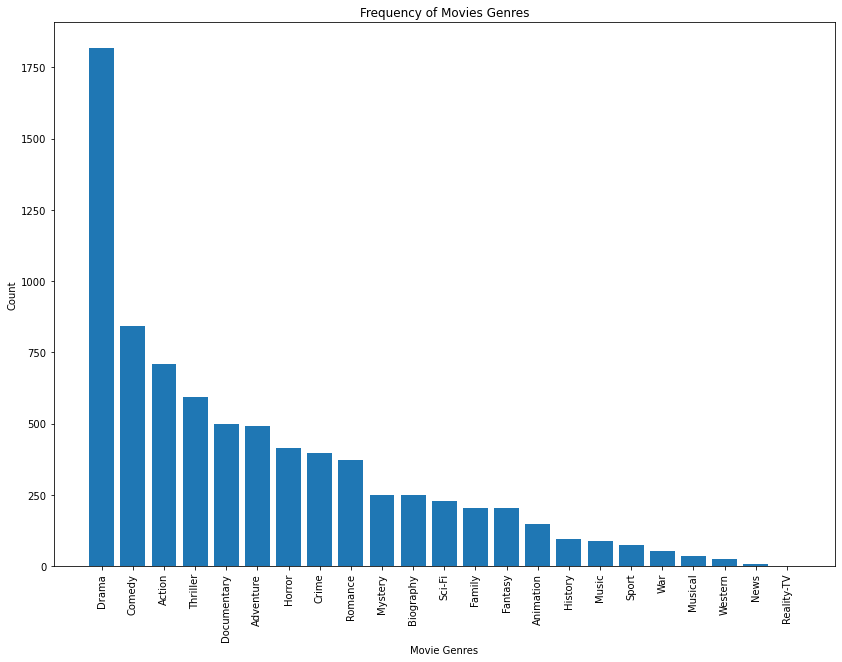

In [25]:
fig, ax = plt.subplots(figsize = (14,10))

ax.bar(df_profits_genres_exploded.genres.value_counts().index, df_profits_genres_exploded.genres.value_counts().values)
ax.set_xlabel("Movie Genres")
ax.set_ylabel("Count")
ax.set_title("Frequency of Movies Genres")
ax.set_xticklabels(df_profits_genres_exploded.genres.value_counts().index,rotation=90);
plt.show()

The most common movie genre by a huge margin was **Drama** followed by **Comedy**, **Action** and **Thriller**.

**Reality TV** and **News** were the least popular genres.

Interesting. Now Let's see the **average net profits of these genres**. 

For this we will use our exploded dataframe where the genres column is no longer a list but just individual rows of genres.

Then we will aggregate profits by each genre and calculate the average to compare profitability acros genres.

In [26]:
# Group by genre and calculate the average profits
df_genres_profits = df_profits_genres_exploded.groupby('genres')['Profits'].mean().sort_values(ascending=False).reset_index()
df_genres_profits

,genres,Profits
0,Animation,2.193994e+08
1,Adventure,1.950899e+08
2,Musical,1.827323e+08
3,Sci-Fi,1.583860e+08
4,Fantasy,1.499609e+08
5,Action,1.140820e+08
6,Family,1.088953e+08
7,Comedy,6.927647e+07
8,Music,4.954076e+07
9,Thriller,4.933863e+07


Some interesting changes. Let's plot this data in order to have a better view.

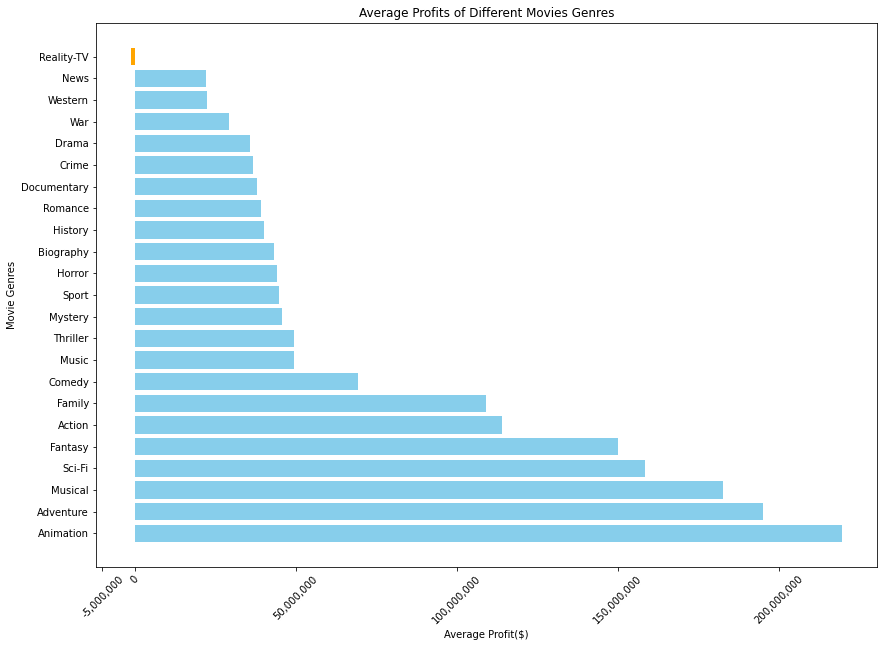

In [27]:
#create a plot for the mean profits per movie genre with different colors for those in profit and those in losses.
colors = df_genres_profits['Profits'].apply(lambda x: 'orange' if x < 0 else 'skyblue')

fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_genres_profits.genres, df_genres_profits.Profits,  color=colors)
ax.set_ylabel("Movie Genres")
ax.set_xlabel("Average Profit($)")
ax.set_title("Average Profits of Different Movies Genres")
ax.set_xticks([-10000000,0,50000000,100000000,150000000,200000000])
ax.set_xticklabels(["-5,000,000","0","50,000,000","100,000,000","150,000,000","200,000,000"])
ax.tick_params(axis='x', rotation=45);
plt.show()

Very interesting. On Average movies with **Animation** as part of their genres yielded the highest profits. Followed by movies with **Adventure** and/or **Musicals** as part of their genres as well.

Movies with **Drama** as part of their genres despite being most common had relatively lower profits compared to the other genres.

**Reality-TV** genre was worst performing with losses.

Movies with the **Animation** genre were less than 250 yet they yielded the most profits. **Adventure** films were also around 500 but the return on investment is very high.

Could other factors be responsible for studios producing such lower numbers of these genres despite the higher returns?

Let's analyze the next relationship between **budget** and **genre** and see.

In [28]:
# Group by genre and calculate the average production budgets
df_genres_budget = df_profits_genres_exploded.groupby('genres')['production_budget'].mean().sort_values(ascending=False).reset_index()
df_genres_budget

,genres,production_budget
0,Adventure,8.722477e+07
1,Animation,8.039302e+07
2,Fantasy,6.591755e+07
3,Sci-Fi,6.428107e+07
4,Action,6.211357e+07
5,Family,4.708113e+07
6,Musical,3.939112e+07
7,Western,3.738200e+07
8,News,3.497143e+07
9,History,3.337667e+07


Let's plot the data to get a better understanding of the budget figures.

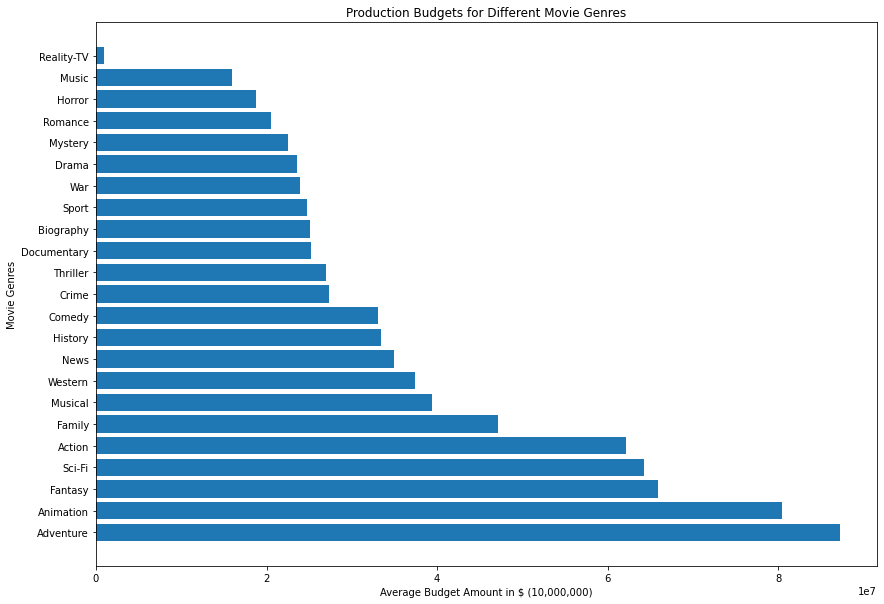

In [29]:
#create a plot for the mean production budgets for different genres.
fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_genres_budget.genres, df_genres_budget.production_budget)
ax.set_ylabel("Movie Genres")
ax.set_xlabel("Average Budget Amount in $ (10,000,000)")
ax.set_title("Production Budgets for Different Movie Genres");
plt.show()

So on **average** movie studios spent more money to make **Adventure** and **Animation** films which could explain why they produce fewer numbers of them. Average budget for an Animation or Adventure movie is over $80,000,000.

**Drama** genres are relatively cheaper to produce costing slightly over $20,000,000 which can explain why studios produce them in higher numbers.

Let's now analyze another relationship between **Movie original language** and **profit**. Do movies produced in specific languages have better box performances?

The Movie DB has an **original language** column we can use.

In [30]:
# reading the movie db tbale with sql
df_tmovie_db.to_sql("tmdb_movies", conn, index= False)

ValueError: Table 'tmdb_movies' already exists.

In [31]:
#reading the profits_genre exploded dataframe in sql
df_profits_genres_exploded.to_sql("profits_3", conn)

ValueError: Table 'profits_3' already exists.

Let's combine data from both tables and analyze the relationship between **original movie language** and **mean profits for each language**.

In [32]:
# Creating a new table that has a movies original language and its profits
language_profits = pd.read_sql("""
SELECT original_language, Profits
FROM tmdb_movies as a
JOIN profits_3 as b
ON b.primary_title = a.original_title
            """,conn)

language_profits.head()

,original_language,Profits
0,en,329870992.0
1,en,329870992.0
2,en,329870992.0
3,en,451156389.0
4,en,451156389.0


In [33]:
#dropping duplicates form the new  language_profits table
language_profits.drop_duplicates().reset_index().head()

,index,original_language,Profits
0,0,en,3.298710e+08
1,3,en,4.511564e+08
2,6,en,6.755246e+08
3,9,en,1.280509e+08
4,12,en,2.351345e+09


Let's have a look at the **different languages** present in our table.

In [34]:
#displaying all the unique languages 
language_profits["original_language"].value_counts()

en    8496
fr      53
es      50
hi      20
de      17
ar      14
pt      11
it      10
th      10
et      10
tl      10
da       6
ko       6
fi       3
ur       3
gu       3
xx       2
te       2
pl       1
fa       1
tr       1
Name: original_language, dtype: int64

The languages are not easily interpretable due to their abbreviations. Let's improve that for visibility and aggregate the **mean profits** netted by each language category.

In [35]:
#group the movie language by mean profits for each language category
df_language_profits = language_profits.groupby('original_language')['Profits'].mean().sort_values(ascending=False).reset_index()

#substitute the laguage abbreviations with full names
abbr = {"en": "English",
"fr": "French",
"es": "Spanish",
"hi": "Hindi",
"de": "German",
"ar": "Arabic",
"pt": "Portuguese",
"tl": "Tagalog",
"it": "Italian",
"th": "Thai",
"et": "Estonian",
"da":"Danish",
"ko": "Korean",
"ur": "Urdu",
"gu": "Gujarati",
"fi": "Finnish",
"te": "Telugu",
"xx": "Unknown / No Language",
"tr": "Turkish",
"fa": "Persian (Farsi)",
"pl": "Polish"}

df_language_profits["original_language"] = df_language_profits["original_language"].map(abbr)
df_language_profits.head()

,original_language,Profits
0,Telugu,2.335029e+08
1,English,8.229358e+07
2,Thai,3.074923e+07
3,Korean,1.741706e+07
4,German,1.723475e+07


Great, now let's plot the data.

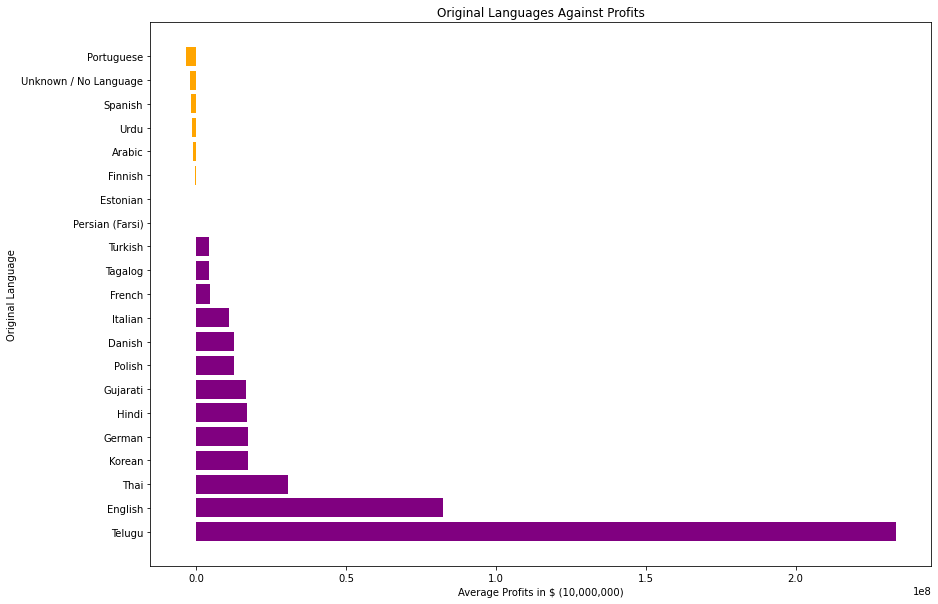

In [36]:
#create a plot for the mean profits per language category with different colors for those in profit and those in losses.
colors = df_language_profits['Profits'].apply(lambda x: 'orange' if x < 0 else 'purple')

fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_language_profits.original_language, df_language_profits.Profits , color = colors)
ax.set_ylabel("Original Language")
ax.set_xlabel("Average Profits in $ (10,000,000)")
ax.set_title("Original Languages Against Profits");
plt.show()


From the plot we can conclude that **Telugu** has a strong regional following in India(Bollywood) so it has a mass audience hence the higher average profit. **English** films dominate the global market due to their widespread appeal and the influence of Hollywood, which benefits from substantial marketing budgets and a large distribution .

There are chances that Turkish struggles with smaller domestic market and limited international appeal hence leading to lower profits.

The popularity of **Turkish**, **Portuguese**, **Spanish**, **Urdu**, **Arabic**, and **Finnish** varies when language-based market performance is examined; nonetheless, Turkish stands out as being especially the riskiest venture due to the its highest average loss. This could represent a small audience.



Next, let's investigate the relationship between a movie's **release schedule** and its **box office performance**. Do movies released in certain **months** or **seasons** perform better than other months?

In [37]:
#convert the release_date variable to datetime data type
df_tn_movie_budgets["release_date"]= pd.to_datetime(df_tn_movie_budgets["release_date"])
#extract the month from each record.
df_tn_movie_budgets["Months"]= df_tn_movie_budgets["release_date"].dt.month_name()
df_tn_movie_budgets["Months"]

0        December
1             May
2            June
3             May
4        December
          ...    
5777     December
5778        April
5779         July
5780    September
5781       August
Name: Months, Length: 5782, dtype: object

Let's aggregate the mean profits generated by movies released in each month of the year.

In [38]:
#convert the profits column to numeric float data type
df_tn_movie_budgets.Profits = df_tn_movie_budgets.Profits.astype(str).str.replace(",","")
df_tn_movie_budgets.Profits = df_tn_movie_budgets.Profits.astype(float)

#group the months by mean profts generated by movies released that month.
df_grouped = df_tn_movie_budgets.groupby('Months')['Profits'].mean().sort_values(ascending= False).reset_index()
df_grouped

,Months,Profits
0,May,1.151328e+08
1,June,9.942391e+07
2,July,9.841746e+07
3,November,9.314157e+07
4,December,6.844157e+07
5,March,4.985129e+07
6,February,4.349811e+07
7,April,3.611743e+07
8,August,3.542232e+07
9,October,2.907190e+07


Let's plot the data.

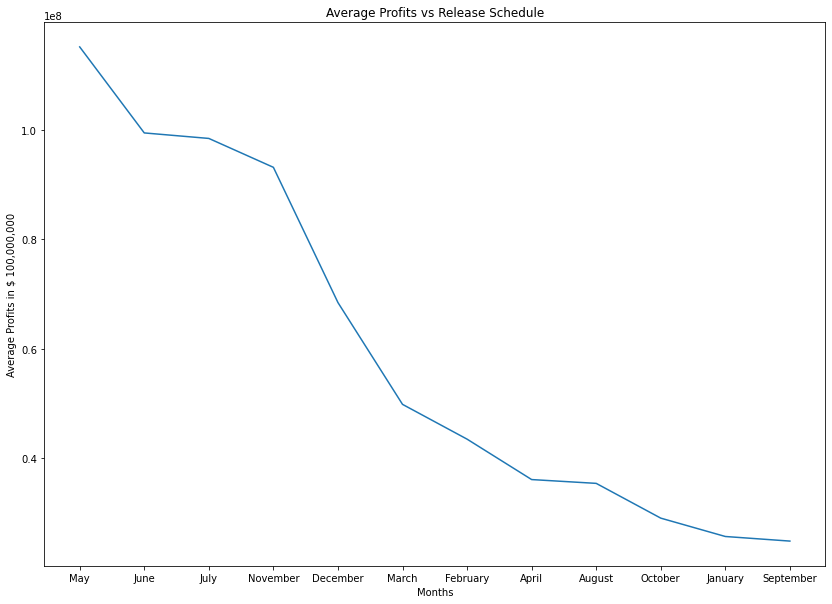

In [39]:
#create a plot for the mean profits per month of movie release.
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(df_grouped.Months, df_grouped.Profits)
ax.set_ylabel("Average Profits in $ 100,000,000")
ax.set_xlabel("Months")
ax.set_title("Average Profits vs Release Schedule");
plt.show()

From the plot, movies released in the **subsequent months of May, June, July** are clearly the most profitable.

In the film industry, certain months tend to be more profitable due to a combination of seasonal factors, holiday seasons, and strategic release patterns. Here’s a breakdown of potential explanations:

Summer Blockbusters **(May to July)**: This is traditionally a peak release period for blockbuster films. Many people are on vacation or school breaks, making it a prime time for movie studios to release high-budget, high-appeal films aimed at attracting large audiences.

Holiday Season **(November and December)**: The holiday season, especially around Thanksgiving in the U.S. and Christmas globally, is another profitable period. Families and friends often go to the movies together, and studios frequently release high-quality films to capture the holiday audience.

Post-holiday and Back-to-school slumps **(January and September)**: January comes after the christmas holiday spending and audience numbers drop. Both months are also affected by re-opening of schools and school related expenses.

Very interesting, but do the same **release schedules** affect **movie genres**? Are there genres that are more popular during specific months of the year? e.g do some genres do better when they are realesed during holiday seasons?

Let's investigate this releationship next. We will find the **top 6** genres in each month by their frequency. 

In [40]:
#change the release_date from object to date time format
df_profits_genres_exploded["release_date"]= pd.to_datetime(df_profits_genres_exploded["release_date"])

#create months column and get only the month from the release_date.
df_profits_genres_exploded["Months"]= df_profits_genres_exploded["release_date"].dt.month_name()

#Group the df_profits_genres_exploded by the months and genres column. 
#Aggregate by the size and sort the values in descending
df_profits_genres_exploded_grouped = df_profits_genres_exploded.groupby(['Months','genres']).size().reset_index(name = 'count')

#group the df_profits_genres_exploded_grouped table formed above by months and only get the maximum count for every genre.
top_genres_per_month = df_profits_genres_exploded_grouped.groupby('Months').apply(lambda x: x.nlargest(6, 'count')).reset_index(drop=True)
#Display the first ten
top_genres_per_month.head(10)

,Months,genres,count
0,April,Drama,166
1,April,Comedy,75
2,April,Documentary,54
3,April,Horror,54
4,April,Thriller,54
5,April,Action,47
6,August,Drama,153
7,August,Action,62
8,August,Thriller,60
9,August,Comedy,57


This data would be more readable with a pivot table.

In [41]:
# Create a pivot table to display only the top_genres_per_month table.
pivot_table = top_genres_per_month.pivot(index='Months', columns='genres', values='count').fillna(0)
pivot_table

genres,Action,Adventure,Biography,Comedy,Crime,Documentary,Drama,Horror,Thriller
Months,,,,,,,,,
April,47.0,0.0,0.0,75.0,0.0,54.0,166.0,54.0,54.0
August,62.0,0.0,0.0,57.0,41.0,0.0,153.0,39.0,60.0
December,78.0,64.0,0.0,105.0,0.0,54.0,252.0,0.0,66.0
February,54.0,37.0,0.0,52.0,0.0,39.0,111.0,0.0,43.0
January,53.0,0.0,0.0,47.0,31.0,0.0,121.0,30.0,48.0
July,59.0,48.0,0.0,85.0,0.0,33.0,104.0,0.0,36.0
June,69.0,55.0,0.0,78.0,0.0,48.0,140.0,0.0,31.0
March,61.0,49.0,0.0,73.0,0.0,48.0,155.0,0.0,47.0
May,55.0,46.0,0.0,70.0,0.0,39.0,108.0,0.0,34.0


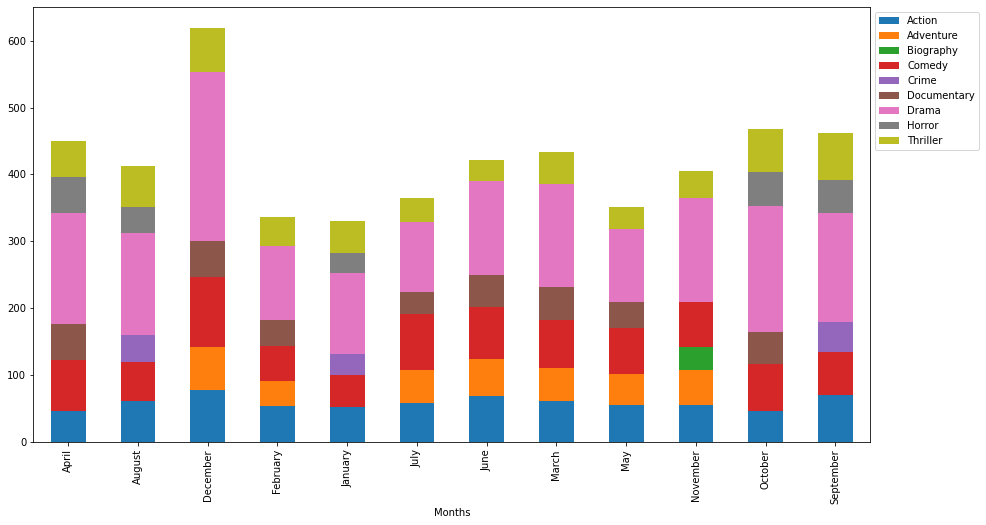

In [42]:
#Plot a visualization for the pivot table above
pivot_table.plot(kind="bar", figsize=(15, 8), stacked=True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show();

**Action genre** films seems to be preferred throughout the year as well as **Drama** and **Comedy**.

**Horror** genres are common during some months like october which can be attributed to seasons like Halloween.

The popularity of drama and action genres over comedy and documentary is rooted in their broad appeal and entertainment value. This popularity translates into higher box office returns and greater profitability for studios, while comedy and documentaries face challenges in attracting large audiences. As the film industry evolves, understanding these dynamics will be crucial for filmmakers looking to maximize their financial success.

So what about **critics/audience ratings**? 
Does **audience satisfaction** affect how well a movie will perform in the box office? Let's see how the quality of a movie affect its profit margins.

In [54]:
#Merger the profits_genres_1 with movie_ratings from the database and only select the averagerating, domestic_gross, worldwide_gross,
#numvotes and Profits columns

query = """
SELECT 
    averagerating, 
    domestic_gross, 
    worldwide_gross,
    production_budget,
    runtime_minutes,
    numvotes,
    Profits 
FROM profits_genres_1
JOIN movie_ratings
USING (movie_id);
"""
DFP_1 = pd.read_sql(query, conn)
DFP_1.head()

,averagerating,domestic_gross,worldwide_gross,production_budget,runtime_minutes,numvotes,Profits
0,6.1,760507625.0,2.776345e+09,425000000.0,93.0,43,"2,351,345,279.00"
1,6.6,241063875.0,1.045664e+09,410600000.0,136.0,447624,"635,063,875.00"
2,6.0,42762350.0,1.497624e+08,350000000.0,113.0,24451,"-200,237,650.00"
3,7.3,459005868.0,1.403014e+09,330600000.0,141.0,665594,"1,072,413,963.00"
4,8.5,678815482.0,2.048134e+09,300000000.0,149.0,670926,"1,748,134,200.00"


In [55]:
# Change the profits column to float.
#Replace the commas with nothing
DFP_1.Profits = DFP_1.Profits.astype(str).str.replace(",","")
DFP_1.Profits = DFP_1.Profits.astype(float)


Let's create a Histogram showing the performance of movies in different rating ranges.

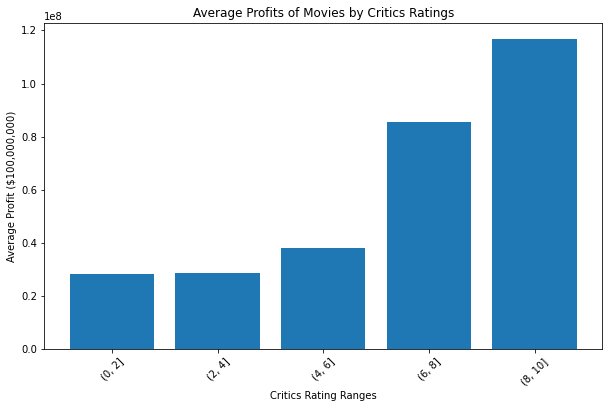

In [56]:
#Plotting the histogram
rating_bins = [0, 2, 4, 6, 8, 10]
DFP_1['rating_range'] = pd.cut(DFP_1['averagerating'], bins=rating_bins)

# Step 2: Group by 'rating_range' and calculate average profits
avg_profit_by_rating = DFP_1.groupby('rating_range')['Profits'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(avg_profit_by_rating['rating_range'].astype(str), avg_profit_by_rating['Profits'])
plt.xlabel("Critics Rating Ranges")
plt.ylabel("Average Profit ($100,000,000)")
plt.title("Average Profits of Movies by Critics Ratings")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

From the plot, it is clear that movies with ratings between **8 and 10** on IMDB are most profitbale while movies with ratings between **0 and 4** are the least earners.

**Higher ratings**,  from audiences or critics, leads to increased profits.  Higher ratings enhance  box office performance due to heightened awareness and interest in the film.

On the other hand **Lower ratings**, particularly from critics, can significantly hinder a film's financial success highlighting how crucial positive reviews are for attracting viewers.

But how significant are these relationships? Let's find this out next and proceed to train a model to help us draw more conclusions/recommendations from the data.

# MODELLING
***

In [57]:
# Find the correlation between the average rating and the box office performances i.e the profits and the grosses.
correlation_data = DFP_1[['averagerating', 'domestic_gross', 'worldwide_gross', 'Profits', 'numvotes']].corr()
correlation_data

,averagerating,domestic_gross,worldwide_gross,Profits,numvotes
averagerating,1.000000,0.177163,0.165675,0.162457,0.311527
domestic_gross,0.177163,1.000000,0.946496,0.937407,0.562929
worldwide_gross,0.165675,0.946496,1.000000,0.984160,0.560203
Profits,0.162457,0.937407,0.984160,1.000000,0.533046
numvotes,0.311527,0.562929,0.560203,0.533046,1.000000


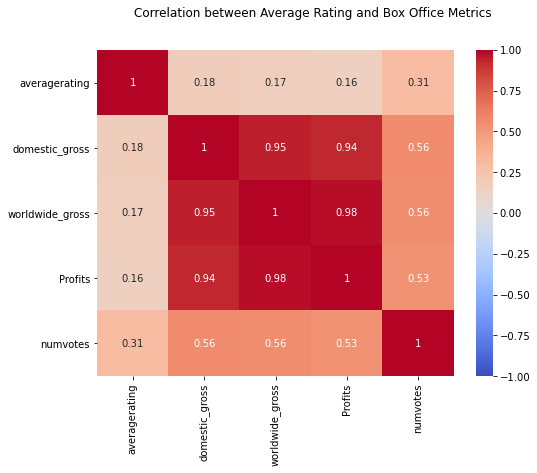

In [58]:
# Plot a heatmap for the correlation table above.
#Initialize the figure
plt.figure(figsize=(8, 6))
#plot the heatmap using th seaborn
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# indicate the title of the heatmap figure.
plt.suptitle('Correlation between Average Rating and Box Office Metrics')
plt.show()

**The heat map scale ranges**

0 - 0.3 weak positive correlation

0.3 - 0.5 moderate positive correlation

0.5 - 1.0 strong positive correlation

From the heatmap and the correlation table, its evident that average rating has a very waek 
correlation to the box office performance, with 
correlation values of 0.17, 0.16 and 0.18 respectively. 

The production_budget shows a strong positive correlation with the box office performance ranging from 0.65 to 0.72.
The production budget and the number of votes are moderately correlated, a correlation value of 0.5.
However, production budget has a weak positive correlation with the average rating.

This imply that while the ratings could influence the box office performance for a movie, other 
factors could result to its financial success.

The number of votes seem to moderately impact the box office performance. It shows that there is the 
tendency of the box office performance to increase with moderate positive correlation of 0.53 and 0.56. 
The number of votes has a very weak positive correlation to the average rating with a correlation 
coeficient of 0.31.

The worldwide gross is highly correlated to domestic gross, a correlation value of 0.95. This implies 
that a movie that performs well in domestic market is likely to perform well in the worldwide market
in profits and vise versa.The number of votes has an almost equally insignificant correlation to the
average rating as to the box office performance.

However, correlation is not always causation. This imply that there are other factors that could influence the correlation.


**Regression Analysis**

We can model for:
 
Dependent variable; profits, domestic gross and worldwide gross.

Independent variable; averagerating, production_budgets and number of votes.
1. linear regression.
2. multiple regression.

In [59]:
correlation_data.head()

,averagerating,domestic_gross,worldwide_gross,Profits,numvotes
averagerating,1.000000,0.177163,0.165675,0.162457,0.311527
domestic_gross,0.177163,1.000000,0.946496,0.937407,0.562929
worldwide_gross,0.165675,0.946496,1.000000,0.984160,0.560203
Profits,0.162457,0.937407,0.984160,1.000000,0.533046
numvotes,0.311527,0.562929,0.560203,0.533046,1.000000


In [60]:
# From the DFP_1 table, determine what the independent and the dependent variables
X = correlation_data['averagerating']
y = correlation_data['Profits']

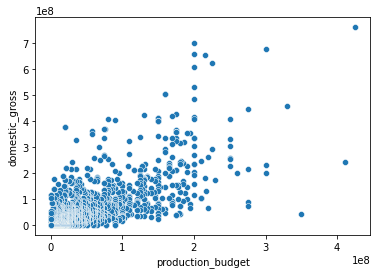

In [61]:
# Plot a scatter plot for production budget vs the domestic gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y= 'domestic_gross',data=DFP_1)
#Include the title
plt.title('Scatter plot (production vs domestic gross)', color = 'blue')
plt.show()

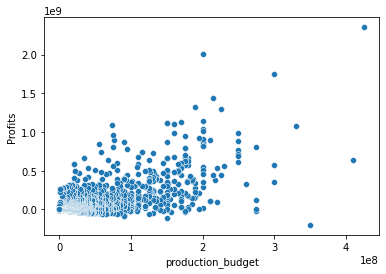

In [62]:
# create a figure and initialize the subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
#plot the scatterplots for each subplots
sns.scatterplot(x='production_budget', y= 'Profits',data=DFP_1, ax = axs[0])
axs[0].set_title('Production Budget vs Profits', color='blue')
axs[0].set_xlabel('Production Budget')
axs[0].set_ylabel('Profits')
#plot the second subplot for the domestic gross
sns.scatterplot(x='production_budget', y= 'domestic_gross',data=DFP_1, ax = axs[1])
sns.scatterplot(x='production_budget', y='domestic_gross', data=DFP_1, ax=axs[1])
axs[1].set_title('Production Budget vs Domestic Gross', color='blue')
axs[1].set_xlabel('Production Budget')
axs[1].set_ylabel('Domestic Gross')
#Adjust the layout of the plots
plt.tight_layout()
plt.show()



In [63]:
# Do a regression model using the production budget as independent and the profits as the dependent variable
X = DFP_1['production_budget'].values.reshape(-1, 1)
y = DFP_1['Profits'].values
# Train with 80% of the data and use 20% of the data to test the model
Budget_train, Budget_test, Profits_train, Profits_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [79]:
 # initializing a method.
regressor = LinearRegression()
# Train our model
regressor.fit(Budget_train, Profits_train)
#display the intercept / bias
print(regressor.intercept_)
#display the coefficient
print(regressor.coef_)

-13549347.529618785
[2.42895419]


In [80]:
Profits_predict = regressor.predict(Budget_test)
# Use the .flatten  method to convert the data to a 1 dimensional array.
comparison_frame = pd.DataFrame({'Actual': Budget_test.flatten(), 'Predicted': Profits_predict.flatten()})
# Display both actual and predicted values of the model.
comparison_frame.describe()

,Actual,Predicted
count,5.750000e+02,5.750000e+02
mean,3.438013e+07,6.995841e+07
std,4.606250e+07,1.118837e+08
min,1.400000e+03,-1.354595e+07
25%,5.000000e+06,-1.404577e+06
50%,1.800000e+07,3.017183e+07
75%,4.400000e+07,9.332464e+07
max,2.750000e+08,6.544131e+08


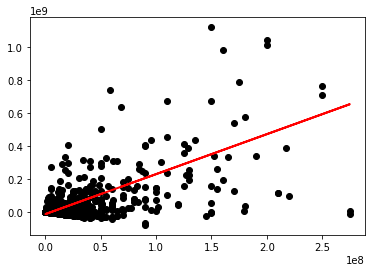

In [81]:
# Plot the model. 
plt.figure(figsize=(10, 6))
# First do the scatter plot for the test values.
plt.scatter(Budget_test, Profits_test, color='black')
# plot the regrssion line for the test value and the predicted value.
plt.plot(Budget_test, Profits_predict, color='red', linewidth=2)
# label the plot, add a title and axes.
plt.title('Budget vs Profits Model', fontsize=16, color = 'blue')
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Profits', fontsize=14)
plt.show();

The above regression model has a positive coefficient of 2.4, which confirms the positive correlation between the production
budget and the profits at the box office.The regression model shows that as production budget value increases, the amount of profits performance at the box office is expected to increase. The coefficient value of 2.4 indicates the amounts of change in the profits for unit change in production budget.

In [82]:
# Relationship between  the domestic gross and the worldwide gross.
X = DFP_1['domestic_gross'].values.reshape(-1, 1)
y = DFP_1['worldwide_gross'].values

domestic_train, domestic_test, Worldwide_train, Worldwide_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [83]:
# initializing a method.
regressor = LinearRegression()
# Train our model
regressor.fit(domestic_train, Worldwide_train)
#display the intercept / bias
print(regressor.intercept_)
#display the coefficient
print(regressor.coef_)

-9178318.321314692
[2.60557053]


In [84]:
Worldwide_predict = regressor.predict(domestic_test)

# Use the .flatten  method to convert the data to a 1 dimensional array
comparison_frame = pd.DataFrame({'Actual':production_test.flatten(), 'Predicted': Worldwide_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,5.750000e+02,5.750000e+02
mean,4.098188e+07,9.760285e+07
std,6.651357e+07,1.733058e+08
min,0.000000e+00,-9.178318e+06
25%,3.569730e+05,-8.248200e+06
50%,1.609900e+07,3.276876e+07
75%,5.358145e+07,1.304319e+08
max,6.085817e+08,1.576524e+09


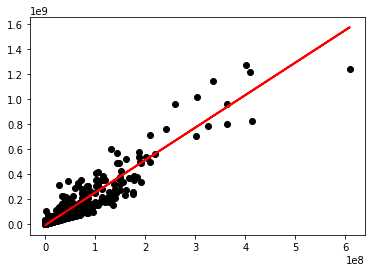

In [85]:
#Plot the model
plt.figure(figsize=(10, 6))
# First do the scatter plot for the test values.
plt.scatter(domestic_test, Worldwide_test, color='black', label = 'Actual values')
# plot the regression line for the test value and the predicted value.
plt.plot(domestic_test, Worldwide_predict, color='red', linewidth=2, label='Predicted Values')
# label the plot, add a title and axes.
plt.title('production vs Worldwide Model', fontsize=16, color = 'blue')
plt.xlabel('production_budget', fontsize=14)
plt.ylabel('Worldwide gross', fontsize=14)
plt.show();

Similarly, the model for production budget and the world wide gross shows the strong positive correlation.
From modelling, the coefficient of 3.4 shows the change in the worldwide gross at the box office for every 
unit change in production budget, it also confirms the strong correlation from the heatmap.

In [86]:
# Relationship between  the domestic gross and the worldwide gross.
X = DFP_1['domestic_gross'].values.reshape(-1, 1)
y = DFP_1['worldwide_gross'].values

domestic_train, domestic_test, Worldwide_train, Worldwide_test  = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
# initializing a method.
regressor = LinearRegression()
# Train our model
regressor.fit(domestic_train, Worldwide_train)
#display the intercept / bias
print(regressor.intercept_)
#display the coefficient
print(regressor.coef_)

-13549347.52961883
[3.42895419]


In [88]:
Worldwide_predict = regressor.predict(domestic_test)

# Use the .flatten  method to convert the data to a 1 dimensional array
comparison_frame = pd.DataFrame({'Actual': domestic_test.flatten(), 'Predicted': Worldwide_predict.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,5.750000e+02,5.750000e+02
mean,3.438013e+07,1.043385e+08
std,4.606250e+07,1.579462e+08
min,1.400000e+03,-1.354455e+07
25%,5.000000e+06,3.595423e+06
50%,1.800000e+07,4.817183e+07
75%,4.400000e+07,1.373246e+08
max,2.750000e+08,9.294131e+08


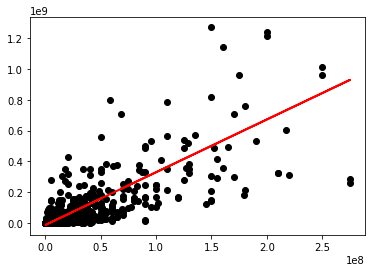

In [89]:
#Plot the model
plt.figure(figsize=(10, 6))
# First do the scatter plot for the test values.
plt.scatter(domestic_test, Worldwide_test, color='black', label = 'Actual values')
# plot the regression line for the test value and the predicted value.
plt.plot(domestic_test, Worldwide_predict, color='red', linewidth=2, label='Predicted Values')
# label the plot, add a title and axes.
plt.title('Domestic vs Worldwide Model', fontsize=16, color = 'blue')
plt.xlabel('Domestic gross', fontsize=14)
plt.ylabel('Worldwide gross', fontsize=14)
plt.show();

The regression model for domestic and worldwide gross confirms their high positive correlation. The 
regression model has a coefficient of 2.6 which determines the amount of chnage for the worldwide gross for unit change in the 
domestic gross. Overally, the above plot, shows that a movie
performance's,domestic gross, is directly proportional to the worldwide gross.


We want to evaluate if higher production budget leads to higher profits

H0 = Higher production budgets do not lead to higher profits
H1 = Higher production budgets leads to higher profits


Tests statistics; mean,standard deviation, and size of the data set. Calculate the Z scores and compare with the pvalue to derive conclusions. Calculate the P value and compare with the correlation coefficient.


Also test whether the worldwide gross significantly exceeds the domestic gross (Use the t-test)

H0 = There is no significant difference between the worldwide and the domestic gross

H1 = the worldwide gross is higher than the domestic gross

*calculate the pvalue of the domestic gross and compare it to the correlation coefficient with that of world wide gross.


sample the data,calculate the sample mean, take the population mean - sample mean then divide by the standard deviation of the sample you get the z_score  from there you do stats.norm.cdf(z_score)


In [90]:
#Find the production budget mean (population mean)
#sample from the production budget and return their means
#normal distribution of the sample means
# choose confidence of interval/ level of significance
# Calculate the Pvalue and compare with the correlation coefficient.

#Sample_data = np.random.choice(DFP_1['production_budget'], size = 30, num_sample = 50)
#Sample_data



SyntaxError: invalid syntax (<ipython-input-90-e1a702f829de>, line 9)

In [91]:
mean = np.mean(DFP_1['production_budget'])
print(mean)
std = np.std(DFP_1['production_budget'])
print(std)

34364268.95930435
47735299.712689035


In [92]:
# statistical function to normalize the mean and the standard deviation and calculate the pvalue
# with a level of significance of 0.05


In [93]:
DFP_1

,averagerating,domestic_gross,worldwide_gross,production_budget,runtime_minutes,numvotes,Profits,rating_range
0,6.1,760507625.0,2.776345e+09,425000000.0,93.0,43,2.351345e+09,"(6, 8]"
1,6.6,241063875.0,1.045664e+09,410600000.0,136.0,447624,6.350639e+08,"(6, 8]"
2,6.0,42762350.0,1.497624e+08,350000000.0,113.0,24451,-2.002376e+08,"(4, 6]"
3,7.3,459005868.0,1.403014e+09,330600000.0,141.0,665594,1.072414e+09,"(6, 8]"
4,8.5,678815482.0,2.048134e+09,300000000.0,149.0,670926,1.748134e+09,"(8, 10]"
...,...,...,...,...,...,...,...,...
2870,7.5,0.0,0.000000e+00,15000.0,60.0,85,-1.500000e+04,"(6, 8]"
2871,4.9,94596.0,9.459600e+04,10000.0,93.0,11,8.459600e+04,"(4, 6]"
2872,6.4,4584.0,4.584000e+03,9000.0,95.0,1436,-4.416000e+03,"(6, 8]"
2873,5.6,0.0,0.000000e+00,7000.0,77.0,43,-7.000000e+03,"(4, 6]"


# RECOMMENDATIONS
***